## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 71.8ms	remaining: 1m 11s
1:	learn: 0.9301086	total: 75.2ms	remaining: 37.5s
2:	learn: 0.9005637	total: 78.3ms	remaining: 26s
3:	learn: 0.8720983	total: 81.5ms	remaining: 20.3s
4:	learn: 0.8467410	total: 84.7ms	remaining: 16.8s
5:	learn: 0.8226672	total: 88.1ms	remaining: 14.6s
6:	learn: 0.7994702	total: 90.9ms	remaining: 12.9s
7:	learn: 0.7784272	total: 93.7ms	remaining: 11.6s
8:	learn: 0.7602192	total: 96.5ms	remaining: 10.6s
9:	learn: 0.7412421	total: 99.6ms	remaining: 9.86s
10:	learn: 0.7247930	total: 102ms	remaining: 9.21s
11:	learn: 0.7089951	total: 105ms	remaining: 8.66s
12:	learn: 0.6951345	total: 108ms	remaining: 8.18s
13:	learn: 0.6809276	total: 111ms	remaining: 7.8s
14:	learn: 0.6692630	total: 113ms	remaining: 7.45s
15:	learn: 0.6588323	total: 117ms	remaining: 7.17s
16:	learn: 0.6472700	total: 120ms	remaining: 6.92s
17:	learn: 0.6379982	total: 122ms	remaining: 6.68s
18:	learn: 0.6294674	total: 125ms	remaining: 6.46s
19:

29:	learn: 0.5571384	total: 200ms	remaining: 6.46s
30:	learn: 0.5536829	total: 203ms	remaining: 6.34s
31:	learn: 0.5505614	total: 206ms	remaining: 6.22s
32:	learn: 0.5475131	total: 208ms	remaining: 6.1s
33:	learn: 0.5445860	total: 211ms	remaining: 6s
34:	learn: 0.5398906	total: 214ms	remaining: 5.9s
35:	learn: 0.5363592	total: 217ms	remaining: 5.81s
36:	learn: 0.5337228	total: 220ms	remaining: 5.72s
37:	learn: 0.5296892	total: 222ms	remaining: 5.63s
38:	learn: 0.5255485	total: 225ms	remaining: 5.55s
39:	learn: 0.5217941	total: 228ms	remaining: 5.48s
40:	learn: 0.5196440	total: 231ms	remaining: 5.41s
41:	learn: 0.5170220	total: 234ms	remaining: 5.33s
42:	learn: 0.5141148	total: 237ms	remaining: 5.26s
43:	learn: 0.5116444	total: 240ms	remaining: 5.21s
44:	learn: 0.5100547	total: 242ms	remaining: 5.14s
45:	learn: 0.5069096	total: 245ms	remaining: 5.08s
46:	learn: 0.5051685	total: 248ms	remaining: 5.02s
47:	learn: 0.5033968	total: 251ms	remaining: 4.97s
48:	learn: 0.5012433	total: 254ms	re

90:	learn: 0.4559969	total: 393ms	remaining: 3.92s
91:	learn: 0.4549716	total: 396ms	remaining: 3.91s
92:	learn: 0.4544919	total: 399ms	remaining: 3.89s
93:	learn: 0.4537693	total: 401ms	remaining: 3.87s
94:	learn: 0.4532673	total: 404ms	remaining: 3.85s
95:	learn: 0.4526987	total: 407ms	remaining: 3.83s
96:	learn: 0.4520952	total: 409ms	remaining: 3.81s
97:	learn: 0.4513919	total: 413ms	remaining: 3.8s
98:	learn: 0.4503747	total: 416ms	remaining: 3.79s
99:	learn: 0.4494783	total: 419ms	remaining: 3.77s
100:	learn: 0.4487329	total: 422ms	remaining: 3.75s
101:	learn: 0.4481325	total: 425ms	remaining: 3.74s
102:	learn: 0.4475445	total: 428ms	remaining: 3.72s
103:	learn: 0.4466014	total: 431ms	remaining: 3.71s
104:	learn: 0.4461730	total: 434ms	remaining: 3.69s
105:	learn: 0.4457259	total: 436ms	remaining: 3.68s
106:	learn: 0.4451085	total: 439ms	remaining: 3.67s
107:	learn: 0.4447909	total: 442ms	remaining: 3.65s
108:	learn: 0.4440936	total: 445ms	remaining: 3.64s
109:	learn: 0.4435519	t

153:	learn: 0.4233079	total: 583ms	remaining: 3.2s
154:	learn: 0.4228876	total: 586ms	remaining: 3.19s
155:	learn: 0.4225404	total: 589ms	remaining: 3.19s
156:	learn: 0.4222831	total: 592ms	remaining: 3.18s
157:	learn: 0.4218088	total: 595ms	remaining: 3.17s
158:	learn: 0.4213239	total: 597ms	remaining: 3.16s
159:	learn: 0.4210022	total: 600ms	remaining: 3.15s
160:	learn: 0.4201256	total: 603ms	remaining: 3.14s
161:	learn: 0.4197073	total: 605ms	remaining: 3.13s
162:	learn: 0.4192052	total: 608ms	remaining: 3.12s
163:	learn: 0.4187949	total: 611ms	remaining: 3.12s
164:	learn: 0.4184572	total: 614ms	remaining: 3.11s
165:	learn: 0.4180680	total: 617ms	remaining: 3.1s
166:	learn: 0.4176884	total: 620ms	remaining: 3.09s
167:	learn: 0.4173026	total: 623ms	remaining: 3.08s
168:	learn: 0.4170486	total: 625ms	remaining: 3.07s
169:	learn: 0.4165960	total: 628ms	remaining: 3.07s
170:	learn: 0.4161870	total: 634ms	remaining: 3.07s
171:	learn: 0.4156228	total: 637ms	remaining: 3.06s
172:	learn: 0.

219:	learn: 0.3986243	total: 774ms	remaining: 2.74s
220:	learn: 0.3982897	total: 777ms	remaining: 2.74s
221:	learn: 0.3981001	total: 780ms	remaining: 2.73s
222:	learn: 0.3978579	total: 782ms	remaining: 2.73s
223:	learn: 0.3976462	total: 785ms	remaining: 2.72s
224:	learn: 0.3973704	total: 788ms	remaining: 2.71s
225:	learn: 0.3971729	total: 790ms	remaining: 2.71s
226:	learn: 0.3968841	total: 793ms	remaining: 2.7s
227:	learn: 0.3965787	total: 796ms	remaining: 2.69s
228:	learn: 0.3963073	total: 799ms	remaining: 2.69s
229:	learn: 0.3960925	total: 801ms	remaining: 2.68s
230:	learn: 0.3957018	total: 804ms	remaining: 2.68s
231:	learn: 0.3954162	total: 808ms	remaining: 2.67s
232:	learn: 0.3951665	total: 811ms	remaining: 2.67s
233:	learn: 0.3949269	total: 814ms	remaining: 2.66s
234:	learn: 0.3945894	total: 817ms	remaining: 2.66s
235:	learn: 0.3944181	total: 819ms	remaining: 2.65s
236:	learn: 0.3941497	total: 822ms	remaining: 2.65s
237:	learn: 0.3939819	total: 825ms	remaining: 2.64s
238:	learn: 0

286:	learn: 0.3824534	total: 966ms	remaining: 2.4s
287:	learn: 0.3821767	total: 968ms	remaining: 2.39s
288:	learn: 0.3819748	total: 971ms	remaining: 2.39s
289:	learn: 0.3817667	total: 974ms	remaining: 2.38s
290:	learn: 0.3815253	total: 977ms	remaining: 2.38s
291:	learn: 0.3813529	total: 980ms	remaining: 2.38s
292:	learn: 0.3812172	total: 982ms	remaining: 2.37s
293:	learn: 0.3809978	total: 985ms	remaining: 2.37s
294:	learn: 0.3807825	total: 988ms	remaining: 2.36s
295:	learn: 0.3805940	total: 991ms	remaining: 2.36s
296:	learn: 0.3801959	total: 994ms	remaining: 2.35s
297:	learn: 0.3799439	total: 996ms	remaining: 2.35s
298:	learn: 0.3797228	total: 999ms	remaining: 2.34s
299:	learn: 0.3795554	total: 1s	remaining: 2.34s
300:	learn: 0.3793733	total: 1s	remaining: 2.33s
301:	learn: 0.3791607	total: 1.01s	remaining: 2.33s
302:	learn: 0.3789297	total: 1.01s	remaining: 2.32s
303:	learn: 0.3787482	total: 1.02s	remaining: 2.34s
304:	learn: 0.3786528	total: 1.02s	remaining: 2.33s
305:	learn: 0.37844

351:	learn: 0.3698930	total: 1.16s	remaining: 2.13s
352:	learn: 0.3697314	total: 1.16s	remaining: 2.13s
353:	learn: 0.3695617	total: 1.16s	remaining: 2.12s
354:	learn: 0.3694397	total: 1.17s	remaining: 2.12s
355:	learn: 0.3692589	total: 1.17s	remaining: 2.12s
356:	learn: 0.3691107	total: 1.17s	remaining: 2.11s
357:	learn: 0.3689645	total: 1.18s	remaining: 2.11s
358:	learn: 0.3687886	total: 1.18s	remaining: 2.1s
359:	learn: 0.3686485	total: 1.18s	remaining: 2.1s
360:	learn: 0.3685749	total: 1.19s	remaining: 2.1s
361:	learn: 0.3683909	total: 1.19s	remaining: 2.09s
362:	learn: 0.3682710	total: 1.19s	remaining: 2.09s
363:	learn: 0.3681254	total: 1.19s	remaining: 2.09s
364:	learn: 0.3679761	total: 1.2s	remaining: 2.08s
365:	learn: 0.3677932	total: 1.2s	remaining: 2.08s
366:	learn: 0.3676022	total: 1.2s	remaining: 2.07s
367:	learn: 0.3674148	total: 1.21s	remaining: 2.07s
368:	learn: 0.3673439	total: 1.21s	remaining: 2.07s
369:	learn: 0.3671985	total: 1.21s	remaining: 2.06s
370:	learn: 0.3670

413:	learn: 0.3599094	total: 1.35s	remaining: 1.91s
414:	learn: 0.3597887	total: 1.35s	remaining: 1.91s
415:	learn: 0.3595791	total: 1.36s	remaining: 1.9s
416:	learn: 0.3594487	total: 1.36s	remaining: 1.9s
417:	learn: 0.3592759	total: 1.36s	remaining: 1.9s
418:	learn: 0.3591088	total: 1.36s	remaining: 1.89s
419:	learn: 0.3589470	total: 1.37s	remaining: 1.89s
420:	learn: 0.3587972	total: 1.37s	remaining: 1.89s
421:	learn: 0.3586831	total: 1.37s	remaining: 1.88s
422:	learn: 0.3585620	total: 1.38s	remaining: 1.88s
423:	learn: 0.3584427	total: 1.38s	remaining: 1.88s
424:	learn: 0.3583044	total: 1.38s	remaining: 1.87s
425:	learn: 0.3581698	total: 1.39s	remaining: 1.87s
426:	learn: 0.3580461	total: 1.39s	remaining: 1.86s
427:	learn: 0.3579182	total: 1.39s	remaining: 1.86s
428:	learn: 0.3577521	total: 1.4s	remaining: 1.86s
429:	learn: 0.3576138	total: 1.4s	remaining: 1.86s
430:	learn: 0.3575528	total: 1.4s	remaining: 1.85s
431:	learn: 0.3574686	total: 1.41s	remaining: 1.85s
432:	learn: 0.3572

471:	learn: 0.3518082	total: 1.54s	remaining: 1.73s
472:	learn: 0.3516593	total: 1.54s	remaining: 1.72s
473:	learn: 0.3514906	total: 1.55s	remaining: 1.72s
474:	learn: 0.3513843	total: 1.55s	remaining: 1.71s
475:	learn: 0.3512406	total: 1.55s	remaining: 1.71s
476:	learn: 0.3510044	total: 1.56s	remaining: 1.71s
477:	learn: 0.3509121	total: 1.56s	remaining: 1.7s
478:	learn: 0.3507270	total: 1.56s	remaining: 1.7s
479:	learn: 0.3506003	total: 1.56s	remaining: 1.7s
480:	learn: 0.3505111	total: 1.57s	remaining: 1.69s
481:	learn: 0.3503906	total: 1.57s	remaining: 1.69s
482:	learn: 0.3501522	total: 1.57s	remaining: 1.68s
483:	learn: 0.3500494	total: 1.58s	remaining: 1.68s
484:	learn: 0.3498921	total: 1.58s	remaining: 1.68s
485:	learn: 0.3497143	total: 1.58s	remaining: 1.67s
486:	learn: 0.3496172	total: 1.58s	remaining: 1.67s
487:	learn: 0.3494609	total: 1.59s	remaining: 1.67s
488:	learn: 0.3493200	total: 1.59s	remaining: 1.66s
489:	learn: 0.3491550	total: 1.59s	remaining: 1.66s
490:	learn: 0.3

532:	learn: 0.3437049	total: 1.73s	remaining: 1.52s
533:	learn: 0.3435053	total: 1.74s	remaining: 1.52s
534:	learn: 0.3433236	total: 1.74s	remaining: 1.51s
535:	learn: 0.3432219	total: 1.74s	remaining: 1.51s
536:	learn: 0.3431615	total: 1.75s	remaining: 1.5s
537:	learn: 0.3430198	total: 1.75s	remaining: 1.5s
538:	learn: 0.3429422	total: 1.75s	remaining: 1.5s
539:	learn: 0.3428024	total: 1.75s	remaining: 1.49s
540:	learn: 0.3426641	total: 1.76s	remaining: 1.49s
541:	learn: 0.3425885	total: 1.76s	remaining: 1.49s
542:	learn: 0.3424695	total: 1.76s	remaining: 1.48s
543:	learn: 0.3423997	total: 1.76s	remaining: 1.48s
544:	learn: 0.3422315	total: 1.77s	remaining: 1.48s
545:	learn: 0.3421242	total: 1.77s	remaining: 1.47s
546:	learn: 0.3419673	total: 1.77s	remaining: 1.47s
547:	learn: 0.3418121	total: 1.78s	remaining: 1.47s
548:	learn: 0.3416228	total: 1.78s	remaining: 1.46s
549:	learn: 0.3414331	total: 1.78s	remaining: 1.46s
550:	learn: 0.3413090	total: 1.79s	remaining: 1.46s
551:	learn: 0.3

596:	learn: 0.3366496	total: 1.93s	remaining: 1.3s
597:	learn: 0.3365561	total: 1.93s	remaining: 1.3s
598:	learn: 0.3364801	total: 1.94s	remaining: 1.29s
599:	learn: 0.3363937	total: 1.94s	remaining: 1.29s
600:	learn: 0.3363054	total: 1.94s	remaining: 1.29s
601:	learn: 0.3361892	total: 1.94s	remaining: 1.28s
602:	learn: 0.3360683	total: 1.95s	remaining: 1.28s
603:	learn: 0.3359807	total: 1.95s	remaining: 1.28s
604:	learn: 0.3359096	total: 1.95s	remaining: 1.27s
605:	learn: 0.3358268	total: 1.96s	remaining: 1.27s
606:	learn: 0.3356597	total: 1.96s	remaining: 1.27s
607:	learn: 0.3355448	total: 1.96s	remaining: 1.26s
608:	learn: 0.3354512	total: 1.97s	remaining: 1.26s
609:	learn: 0.3353398	total: 1.97s	remaining: 1.26s
610:	learn: 0.3352669	total: 1.97s	remaining: 1.25s
611:	learn: 0.3351716	total: 1.98s	remaining: 1.25s
612:	learn: 0.3351155	total: 1.98s	remaining: 1.25s
613:	learn: 0.3350041	total: 1.98s	remaining: 1.25s
614:	learn: 0.3349098	total: 1.99s	remaining: 1.24s
615:	learn: 0.

660:	learn: 0.3300983	total: 2.12s	remaining: 1.09s
661:	learn: 0.3299994	total: 2.13s	remaining: 1.08s
662:	learn: 0.3299184	total: 2.13s	remaining: 1.08s
663:	learn: 0.3298189	total: 2.14s	remaining: 1.08s
664:	learn: 0.3296970	total: 2.14s	remaining: 1.08s
665:	learn: 0.3296671	total: 2.14s	remaining: 1.07s
666:	learn: 0.3295999	total: 2.15s	remaining: 1.07s
667:	learn: 0.3295390	total: 2.15s	remaining: 1.07s
668:	learn: 0.3294195	total: 2.15s	remaining: 1.06s
669:	learn: 0.3293185	total: 2.15s	remaining: 1.06s
670:	learn: 0.3292086	total: 2.16s	remaining: 1.06s
671:	learn: 0.3289913	total: 2.16s	remaining: 1.05s
672:	learn: 0.3288859	total: 2.16s	remaining: 1.05s
673:	learn: 0.3288145	total: 2.17s	remaining: 1.05s
674:	learn: 0.3286969	total: 2.17s	remaining: 1.04s
675:	learn: 0.3286108	total: 2.17s	remaining: 1.04s
676:	learn: 0.3285218	total: 2.17s	remaining: 1.04s
677:	learn: 0.3284620	total: 2.18s	remaining: 1.03s
678:	learn: 0.3283999	total: 2.18s	remaining: 1.03s
679:	learn: 

722:	learn: 0.3244558	total: 2.32s	remaining: 887ms
723:	learn: 0.3243835	total: 2.32s	remaining: 884ms
724:	learn: 0.3242957	total: 2.32s	remaining: 880ms
725:	learn: 0.3242628	total: 2.32s	remaining: 877ms
726:	learn: 0.3242076	total: 2.33s	remaining: 874ms
727:	learn: 0.3240923	total: 2.33s	remaining: 870ms
728:	learn: 0.3240148	total: 2.33s	remaining: 867ms
729:	learn: 0.3239014	total: 2.33s	remaining: 863ms
730:	learn: 0.3237918	total: 2.34s	remaining: 860ms
731:	learn: 0.3236654	total: 2.34s	remaining: 857ms
732:	learn: 0.3235938	total: 2.34s	remaining: 853ms
733:	learn: 0.3235120	total: 2.34s	remaining: 850ms
734:	learn: 0.3234421	total: 2.35s	remaining: 846ms
735:	learn: 0.3233367	total: 2.35s	remaining: 843ms
736:	learn: 0.3232438	total: 2.35s	remaining: 840ms
737:	learn: 0.3231289	total: 2.35s	remaining: 836ms
738:	learn: 0.3230697	total: 2.36s	remaining: 833ms
739:	learn: 0.3229734	total: 2.36s	remaining: 829ms
740:	learn: 0.3228697	total: 2.36s	remaining: 826ms
741:	learn: 

788:	learn: 0.3186601	total: 2.51s	remaining: 670ms
789:	learn: 0.3185886	total: 2.51s	remaining: 667ms
790:	learn: 0.3185418	total: 2.51s	remaining: 664ms
791:	learn: 0.3184514	total: 2.52s	remaining: 661ms
792:	learn: 0.3183529	total: 2.52s	remaining: 657ms
793:	learn: 0.3182569	total: 2.52s	remaining: 654ms
794:	learn: 0.3181932	total: 2.52s	remaining: 651ms
795:	learn: 0.3180848	total: 2.53s	remaining: 648ms
796:	learn: 0.3180327	total: 2.53s	remaining: 644ms
797:	learn: 0.3179305	total: 2.53s	remaining: 641ms
798:	learn: 0.3178456	total: 2.54s	remaining: 638ms
799:	learn: 0.3177655	total: 2.54s	remaining: 635ms
800:	learn: 0.3176826	total: 2.54s	remaining: 632ms
801:	learn: 0.3176217	total: 2.55s	remaining: 629ms
802:	learn: 0.3174842	total: 2.55s	remaining: 626ms
803:	learn: 0.3173800	total: 2.55s	remaining: 622ms
804:	learn: 0.3172892	total: 2.56s	remaining: 619ms
805:	learn: 0.3172199	total: 2.56s	remaining: 616ms
806:	learn: 0.3171379	total: 2.56s	remaining: 613ms
807:	learn: 

850:	learn: 0.3137138	total: 2.7s	remaining: 473ms
851:	learn: 0.3136859	total: 2.7s	remaining: 469ms
852:	learn: 0.3136054	total: 2.7s	remaining: 466ms
853:	learn: 0.3135239	total: 2.71s	remaining: 463ms
854:	learn: 0.3134711	total: 2.71s	remaining: 460ms
855:	learn: 0.3134242	total: 2.71s	remaining: 457ms
856:	learn: 0.3133249	total: 2.72s	remaining: 453ms
857:	learn: 0.3132311	total: 2.72s	remaining: 450ms
858:	learn: 0.3131446	total: 2.72s	remaining: 447ms
859:	learn: 0.3130587	total: 2.73s	remaining: 444ms
860:	learn: 0.3129229	total: 2.73s	remaining: 441ms
861:	learn: 0.3128651	total: 2.73s	remaining: 437ms
862:	learn: 0.3127812	total: 2.73s	remaining: 434ms
863:	learn: 0.3126884	total: 2.74s	remaining: 431ms
864:	learn: 0.3126358	total: 2.74s	remaining: 428ms
865:	learn: 0.3125933	total: 2.74s	remaining: 424ms
866:	learn: 0.3125160	total: 2.75s	remaining: 421ms
867:	learn: 0.3124401	total: 2.75s	remaining: 418ms
868:	learn: 0.3123064	total: 2.75s	remaining: 415ms
869:	learn: 0.3

909:	learn: 0.3093784	total: 2.9s	remaining: 287ms
910:	learn: 0.3093058	total: 2.9s	remaining: 283ms
911:	learn: 0.3092574	total: 2.9s	remaining: 280ms
912:	learn: 0.3092023	total: 2.91s	remaining: 277ms
913:	learn: 0.3091306	total: 2.91s	remaining: 274ms
914:	learn: 0.3090719	total: 2.92s	remaining: 271ms
915:	learn: 0.3090199	total: 2.92s	remaining: 268ms
916:	learn: 0.3089417	total: 2.92s	remaining: 265ms
917:	learn: 0.3088562	total: 2.93s	remaining: 262ms
918:	learn: 0.3087578	total: 2.94s	remaining: 259ms
919:	learn: 0.3086793	total: 2.94s	remaining: 255ms
920:	learn: 0.3086255	total: 2.94s	remaining: 253ms
921:	learn: 0.3085073	total: 2.95s	remaining: 249ms
922:	learn: 0.3084388	total: 2.95s	remaining: 246ms
923:	learn: 0.3083752	total: 2.96s	remaining: 243ms
924:	learn: 0.3082889	total: 2.96s	remaining: 240ms
925:	learn: 0.3081901	total: 2.96s	remaining: 237ms
926:	learn: 0.3081106	total: 2.96s	remaining: 233ms
927:	learn: 0.3080422	total: 2.97s	remaining: 230ms
928:	learn: 0.3

969:	learn: 0.3049028	total: 3.09s	remaining: 95.5ms
970:	learn: 0.3048446	total: 3.09s	remaining: 92.3ms
971:	learn: 0.3047712	total: 3.09s	remaining: 89.1ms
972:	learn: 0.3047313	total: 3.1s	remaining: 85.9ms
973:	learn: 0.3046600	total: 3.1s	remaining: 82.7ms
974:	learn: 0.3045983	total: 3.1s	remaining: 79.5ms
975:	learn: 0.3044944	total: 3.1s	remaining: 76.3ms
976:	learn: 0.3044431	total: 3.11s	remaining: 73.1ms
977:	learn: 0.3043959	total: 3.11s	remaining: 70ms
978:	learn: 0.3043249	total: 3.11s	remaining: 66.8ms
979:	learn: 0.3042644	total: 3.12s	remaining: 63.6ms
980:	learn: 0.3042142	total: 3.12s	remaining: 60.4ms
981:	learn: 0.3041509	total: 3.12s	remaining: 57.2ms
982:	learn: 0.3041077	total: 3.12s	remaining: 54ms
983:	learn: 0.3040665	total: 3.13s	remaining: 50.8ms
984:	learn: 0.3040237	total: 3.13s	remaining: 47.7ms
985:	learn: 0.3039532	total: 3.13s	remaining: 44.5ms
986:	learn: 0.3038723	total: 3.14s	remaining: 41.3ms
987:	learn: 0.3038141	total: 3.14s	remaining: 38.1ms
9

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
2257248967.2625456


#### Sanity Checks 

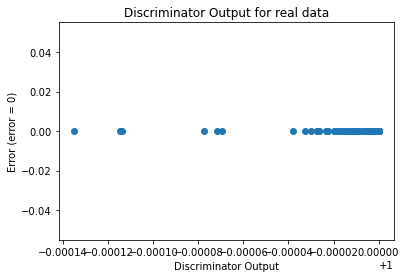

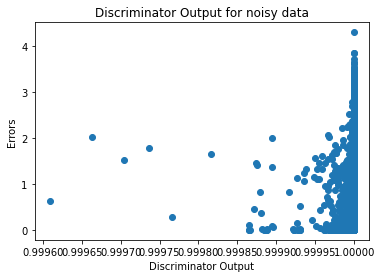

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)